In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import utils

In [3]:
import classification

In [4]:
imgs_path = 'public_tests/00_test_img_input/train/images/'
labels_path= 'public_tests/00_test_img_input/train/gt.csv'

In [5]:
labels = utils.load_labels(labels_path)

In [6]:
train_set = classification.BirdsClassificationDataset(imgs_path, labels, 'train', transform=classification.default_transform) #BirdsClassificationDataModule(imgs_path, labels, 1)

In [7]:
train_set[0][0].shape

torch.Size([3, 224, 224])

In [8]:
def calc_means_stds():
    means = np.zeros(3)
    stds = np.zeros_like(means)
    for i in range(len(train_set)):
        x = train_set[i][0].detach().numpy()
        means += np.mean(x, axis=(1,2))
        stds += np.std(x, axis = (1, 2))
    means /= len(train_set)
    stds /= len(train_set)
    print(means)
    print(stds)

TypeError: Invalid shape (3, 224, 224) for image data

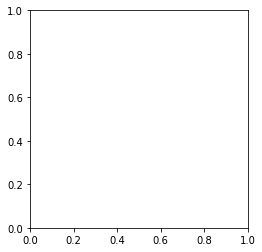

In [9]:
for i in range(10):
    # print(train_set[i][0][1])
    utils.vizualize(train_set[i][0], transpose=False)

In [10]:
module = classification.BirdsClassifierTrainingModule.load_from_checkpoint('birds_model.ckpt')

In [12]:
import torch

In [13]:
torch.save(module.model.state_dict(), 'birds_model.ckpt')

In [16]:
model = classification.MobileNetClassifier(num_classes=50, init_weights=False, unfreeze=2)

In [17]:
model.load_state_dict(torch.load('birds_model.ckpt'))

<All keys matched successfully>

In [28]:
params = list(model.named_parameters())

In [38]:
len([[n] for n, p in params])

344